### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.enable_eager_execution()
tf.set_random_seed(100)

In [2]:
tf.__version__

'1.13.1'

In [3]:
import numpy as np
import pandas as pd

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings;
warnings.simplefilter('ignore')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Collect Data

In [6]:
import keras as kr

Using TensorFlow backend.


In [7]:
(trainX, trainY), (testX, testY) = kr.datasets.fashion_mnist.load_data()

In [8]:
print(testY[0:5])

[9 2 1 1 6]


In [9]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [10]:
np.unique(trainY)
np.unique(testY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
trainY[0:5]

array([9, 0, 0, 3, 0], dtype=uint8)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [12]:
#print(trainY.shape)
print('First 5 examples now are:\n', trainY[0:5])

First 5 examples now are:
 [9 0 0 3 0]


In [13]:
trainY_old=trainY
testY_Old=testY
trainY=tf.keras.utils.to_categorical(y=trainY)
testY=tf.keras.utils.to_categorical(y=testY)

In [14]:
trainY[0:5]
testY[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [15]:
#print(trainY.shape)
print('First 5 examples now are:\n',trainY[0:5])

First 5 examples now are:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

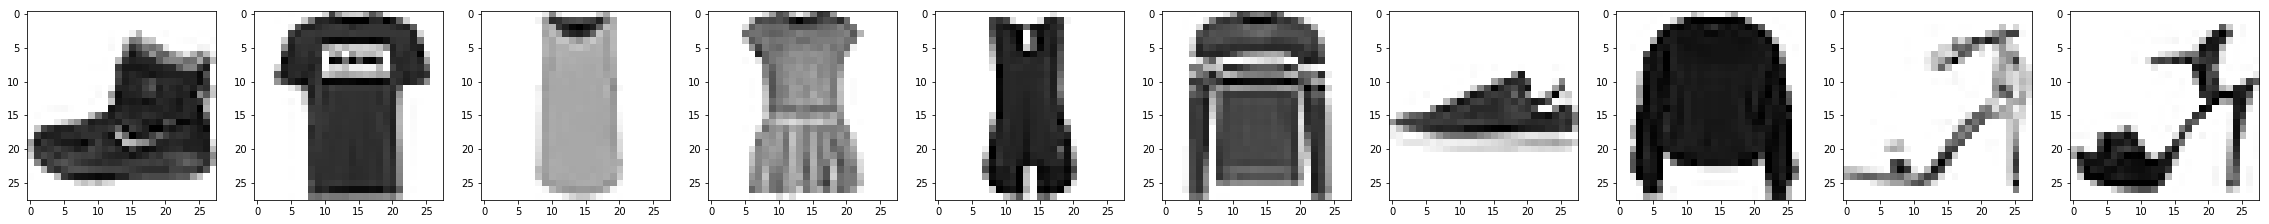

In [16]:
f,arr=plt.subplots(ncols=10)
f.set_size_inches(40,40)
for i in range(10):
    x=arr[i].imshow(trainX[i],cmap=plt.cm.binary,label=trainY_old[i])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [17]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
sgd_optimizer=tf.keras.optimizers.SGD(lr=0.03)
model.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy')

Instructions for updating:
Colocations handled automatically by placer.


### Execute the model using model.fit()

In [18]:
model.fit(trainX,trainY,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 2s 39us/sample - loss: 14.5012
Epoch 2/10
60000/60000 [==============================] - 2s 37us/sample - loss: 14.5063
Epoch 3/10
60000/60000 [==============================] - 2s 37us/sample - loss: 14.5063
Epoch 4/10
60000/60000 [==============================] - 2s 37us/sample - loss: 14.5063
Epoch 5/10
60000/60000 [==============================] - 2s 41us/sample - loss: 14.5063
Epoch 6/10
60000/60000 [==============================] - 2s 37us/sample - loss: 14.5063
Epoch 7/10
60000/60000 [==============================] - 2s 38us/sample - loss: 14.5063
Epoch 8/10
60000/60000 [==============================] - 2s 37us/sample - loss: 14.5063
Epoch 9/10
60000/60000 [==============================] - 2s 37us/sample - loss: 14.5063
Epoch 10/10
60000/60000 [==============================] - 2s 38us/sample - loss: 14.5063


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [19]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model2.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

### Execute the model

In [20]:
model2.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.5588
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4808
Epoch 3/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4690
Epoch 4/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4614
Epoch 5/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4550
Epoch 6/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4487
Epoch 7/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4480
Epoch 8/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4458
Epoch 9/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4416
Epoch 10/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.44150s - loss: 0. - ETA: 0s - loss:


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [21]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model2.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')
model2.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4059
Epoch 2/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.40160s - loss
Epoch 3/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4022
Epoch 4/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3999
Epoch 5/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.39950s - loss
Epoch 6/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4014
Epoch 7/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4003
Epoch 8/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4015
Epoch 9/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3991
Epoch 10/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4008


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [22]:
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model2.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

## Review model

In [23]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total para

### Run the model

In [24]:
model2.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 60us/sample - loss: 2.3038
Epoch 2/10
60000/60000 [==============================] - 3s 56us/sample - loss: 2.2974
Epoch 3/10
60000/60000 [==============================] - 4s 67us/sample - loss: 2.2897
Epoch 4/10
60000/60000 [==============================] - 4s 63us/sample - loss: 2.2650
Epoch 5/10
60000/60000 [==============================] - 3s 57us/sample - loss: 2.0372
Epoch 6/10
60000/60000 [==============================] - 3s 57us/sample - loss: 1.5008
Epoch 7/10
60000/60000 [==============================] - 4s 60us/sample - loss: 1.1806
Epoch 8/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.94750s - loss: 0.9
Epoch 9/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.8575
Epoch 10/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.8264
